<a href="https://colab.research.google.com/github/Anwesha-dash811/Datavisualization/blob/main/geospatial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 6.3MB/s 
     |████████████████████████████████| 6.5MB 17.2MB/s 
     |████████████████████████████████| 14.8MB 324kB/s 


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
#Reading gdp dataset
gdp = pd.read_csv('API_NY.GDP.MKTP.KD_DS2_en_csv_v2_1622113.csv', sep = ',', encoding='cp1252', skiprows=4)
#Reading population dataset
popu=pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1637443.csv', sep = ',', encoding='cp1252', skiprows=4)
#import world shape map externally, no need to have a saved fil
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


###### ****EXPLORING GDP DATASET****

In [ ]:
gdp.info()

In [ ]:
df = gdp[['Country Name','1995','2005','2015']].fillna(0)
df.columns
df.head()

,Country Name,1995,2005,2015
0,Aruba,2.145067e+09,2.698825e+09,2.694320e+09
1,Afghanistan,0.000000e+00,9.164598e+09,1.975974e+10
2,Angola,2.680850e+10,5.604610e+10,1.045196e+11
3,Albania,5.429695e+09,9.223203e+09,1.303338e+10
4,Andorra,2.080046e+09,3.697349e+09,3.287459e+09


###### ****EXPLORING POPULATION DATASET****

In [ ]:
popu.info()

In [ ]:
df1= popu[['Country Name','1995','2005','2015']].fillna(1)
df1.head()

,Country Name,1995,2005,2015
0,Aruba,80324.0,100031.0,104341.0
1,Afghanistan,18110657.0,25654277.0,34413603.0
2,Angola,13945206.0,19433602.0,27884381.0
3,Albania,3187784.0,3011487.0,2880703.0
4,Andorra,63850.0,78867.0,78011.0


###### ****MERGING THE TWO DATASETS*****

In [ ]:
df2 = pd.merge(df,df1, on = 'Country Name')
df2.head()

,Country Name,1995_x,2005_x,2015_x,1995_y,2005_y,2015_y
0,Aruba,2.145067e+09,2.698825e+09,2.694320e+09,80324.0,100031.0,104341.0
1,Afghanistan,0.000000e+00,9.164598e+09,1.975974e+10,18110657.0,25654277.0,34413603.0
2,Angola,2.680850e+10,5.604610e+10,1.045196e+11,13945206.0,19433602.0,27884381.0
3,Albania,5.429695e+09,9.223203e+09,1.303338e+10,3187784.0,3011487.0,2880703.0
4,Andorra,2.080046e+09,3.697349e+09,3.287459e+09,63850.0,78867.0,78011.0


###### ****GDP PER CAPITA CALCULATION****

In [ ]:
df2['1995_gdp_capita']=df2['1995_x']/df2['1995_x']
df2['2005_gdp_capita']=df2['2005_x']/df2['2005_x']
df2['2015_gdp_capita']=df2['2015_x']/df2['2015_x']
df2.head()


,Country Name,1995_x,2005_x,2015_x,1995_y,2005_y,2015_y,1995_gdp_capita,2005_gdp_capita,2015_gdp_capita
0,Aruba,2.145067e+09,2.698825e+09,2.694320e+09,80324.0,100031.0,104341.0,1.0,1.0,1.0
1,Afghanistan,0.000000e+00,9.164598e+09,1.975974e+10,18110657.0,25654277.0,34413603.0,NaN,1.0,1.0
2,Angola,2.680850e+10,5.604610e+10,1.045196e+11,13945206.0,19433602.0,27884381.0,1.0,1.0,1.0
3,Albania,5.429695e+09,9.223203e+09,1.303338e+10,3187784.0,3011487.0,2880703.0,1.0,1.0,1.0
4,Andorra,2.080046e+09,3.697349e+09,3.287459e+09,63850.0,78867.0,78011.0,1.0,1.0,1.0


###### ****MERGING WORLD DATASET WITH OTHER DATSETS****

In [ ]:
w_df=pd.merge(world,df2, left_on='name', right_on='Country Name') 
w_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,1995_x,2005_x,2015_x,1995_y,2005_y,2015_y,1995_gdp_capita,2005_gdp_capita,2015_gdp_capita
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2.421813e+09,3.031738e+09,3.786536e+09,775425.0,821604.0,868627.0,1.0,1.0,1.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,1.381270e+10,2.379121e+10,4.358329e+10,29649135.0,38450320.0,51482633.0,1.0,1.0,1.0
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,1.015883e+12,1.433915e+12,1.794501e+12,29302311.0,32243753.0,35702908.0,1.0,1.0,1.0
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,5.912624e+10,1.094825e+11,1.862603e+11,15815626.0,15147029.0,17542806.0,1.0,1.0,1.0
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,1.996930e+10,3.130678e+10,6.693479e+10,22785000.0,26167000.0,31298900.0,1.0,1.0,1.0


###### ****WORLD GDP PER CAPITA FOR 1995,2005,2015****

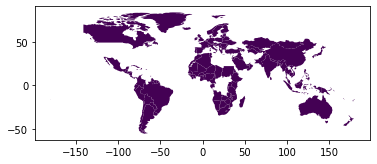

In [ ]:
w_df.plot(column='1995_gdp_capita')

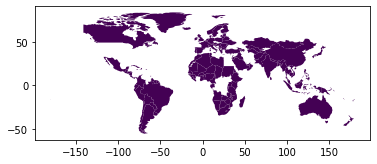

In [ ]:
w_df.plot(column='2005_gdp_capita')

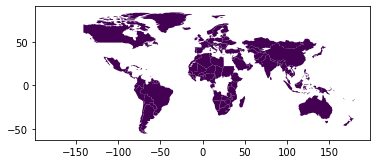

In [ ]:
w_df.plot(column='2015_gdp_capita')

## QUESTION NUMBER 1

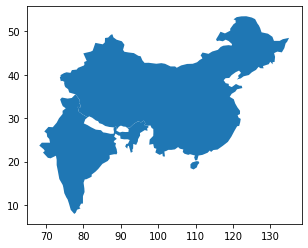

In [ ]:
df_3= w_df[w_df['pop_est'] >= 300000000]
df_3.plot()

## QUESTION NUMBER 2

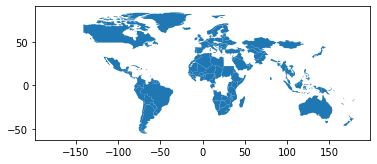

In [ ]:
df_7= w_df[w_df['pop_est'] <= 700000000]
df_7.plot()

## QUESTION NUMBER 3

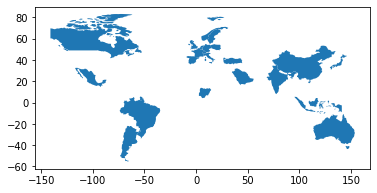

In [ ]:
df_45_89= w_df[(w_df['2015_x'] >= 450000000000) & (w_df['2015_x'] <= 8920000000000)]
df_45_89.plot()

In [ ]:
max = w_df[w_df['2015_y'] == w_df['2015_y'].max()]
max['name']
max

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,1995_x,2005_x,2015_x,1995_y,2005_y,2015_y,1995_gdp_capita,2005_gdp_capita,2015_gdp_capita
116,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",China,1.475765e+12,3.561979e+12,8.913317e+12,1.204855e+09,1.303720e+09,1.371220e+09,1.0,1.0,1.0


In [ ]:
per=(max['2015_gdp_capita']-max['1995_gdp_capita'])/max['2015_gdp_capita']
per

116    0.0
dtype: float64

## QUESTION 4

In [ ]:
acc = df.loc[:, '1995':'2015'].fillna(1)/df1.loc[:, '1995':'2015'].fillna(1)
acc


,1995,2005,2015
0,26705.181321,26979.885398,25822.251375
1,0.000000,357.234720,574.184114
2,1922.416597,2883.978818,3748.320623
3,1703.281845,3062.673883,4524.373086
4,32577.067362,46880.806105,42140.961798
...,...,...,...
259,0.000000,2682.076961,3816.962448
260,1060.722869,1243.431089,785.338458
261,5615.299120,6729.827466,7556.788579
262,909.583374,1126.031936,1641.006985


In [ ]:
gdp_acc = pd.concat([df['Country Name'], acc], axis=1)
gdp_acc['gdp_mean'] = gdp_acc.mean(axis=1)
gdp_acc

,Country Name,1995,2005,2015,gdp_mean
0,Aruba,26705.181321,26979.885398,25822.251375,26502.439365
1,Afghanistan,0.000000,357.234720,574.184114,310.472945
2,Angola,1922.416597,2883.978818,3748.320623,2851.572013
3,Albania,1703.281845,3062.673883,4524.373086,3096.776271
4,Andorra,32577.067362,46880.806105,42140.961798,40532.945088
...,...,...,...,...,...
259,Kosovo,0.000000,2682.076961,3816.962448,2166.346470
260,"Yemen, Rep.",1060.722869,1243.431089,785.338458,1029.830805
261,South Africa,5615.299120,6729.827466,7556.788579,6633.971722
262,Zambia,909.583374,1126.031936,1641.006985,1225.540765


In [ ]:
world_acc = pd.merge(world,gdp_acc, left_on='name', right_on='Country Name')
world_acc.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,1995,2005,2015,gdp_mean
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,3123.207406,3690.023765,4359.220151,3724.150441
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,465.871823,618.751893,846.563013,643.728910
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,34669.028290,44471.080072,50262.027666,43134.045342
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,3738.469473,7227.982949,10617.474655,7194.642359
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,876.423235,1196.422386,2138.566925,1403.804182


## QUESTION 5

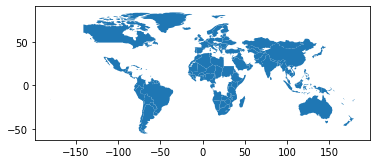

In [ ]:
world_acc.plot()

## QUESTION 6

In [ ]:
mean = popu.loc[:, '1995':'2015'].fillna(0)

In [ ]:
mean = pd.concat([popu['Country Name'], mean], axis=1)
mean.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0
1,Afghanistan,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0
2,Angola,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0
3,Albania,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0
4,Andorra,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0


In [ ]:
mean['mean_popu'] = mean.mean(axis=1)
mean.tail()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,mean_popu
259,Kosovo,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1.803524e+06
260,"Yemen, Rep.",14913315.0,15469274.0,15975668.0,16450310.0,16921149.0,17409072.0,17918373.0,18443691.0,18985000.0,19540098.0,20107409.0,20687646.0,21282515.0,21892146.0,22516460.0,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,2.035315e+07
261,South Africa,41435758.0,42241011.0,42987461.0,43682260.0,44338543.0,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,4.813375e+07
262,Zambia,9096607.0,9339733.0,9597609.0,9866476.0,10140561.0,10415944.0,10692193.0,10971698.0,11256743.0,11550642.0,11856247.0,12173514.0,12502958.0,12848530.0,13215139.0,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,1.208688e+07
263,Zimbabwe,11410714.0,11541217.0,11653242.0,11747072.0,11822719.0,11881477.0,11923914.0,11954290.0,11982224.0,12019912.0,12076699.0,12155491.0,12255922.0,12379549.0,12526968.0,12697723.0,12894316.0,13115131.0,13350356.0,13586681.0,13814629.0,1.232335e+07


In [ ]:
correlate = pd.concat([popu['Country Name'], gdp_acc['gdp_mean'], mean['mean_popu']], axis=1)
correlate ['mean_million'] = correlate['mean_popu']/1e6
correlate.max()

Country Name       Zimbabwe
gdp_mean             153252
mean_popu       6.51761e+09
mean_million        6517.61
dtype: object

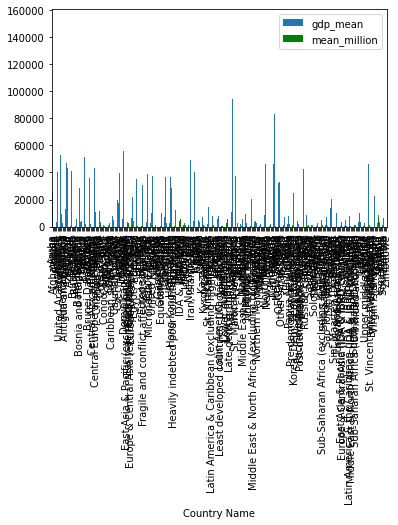

In [ ]:
ax = plt.gca()
correlate.plot(kind='bar',x='Country Name',y='gdp_mean',ax=ax)
correlate.plot(kind='bar',x='Country Name',y='mean_million', color='green', ax=ax)

In [ ]:
correlate_df

,Country Name,gdp_mean,mean_popu,mean_million
0,Aruba,26502.439365,9.629538e+04,0.096295
1,Afghanistan,310.472945,2.549754e+07,25.497539
2,Angola,2851.572013,2.001951e+07,20.019514
3,Albania,3096.776271,3.011456e+06,3.011456
4,Andorra,40532.945088,7.489262e+04,0.074893
...,...,...,...,...
259,Kosovo,2166.346470,1.803524e+06,1.803524
260,"Yemen, Rep.",1029.830805,2.035315e+07,20.353154
261,South Africa,6633.971722,4.813375e+07,48.133751
262,Zambia,1225.540765,1.208688e+07,12.086881
